In [87]:
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import process
import seaborn as sns
import matplotlib.pyplot as plt

## Explorative data analysis

In [88]:
df_movies = pd.read_csv("../data/Large-data/ml-latest/movies.csv")
df_ratings = pd.read_csv("../data/Large-data/ml-latest/ratings.csv")

df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [89]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [90]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [91]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


## Finding the 10 most rated movies

In [92]:
# make new dataframe of movieId and times rated
most_rated = df_ratings["movieId"].value_counts().reset_index().rename(columns={"index": "movieId", "movieId": "times_rated"})
most_rated

,movieId,times_rated
0,318,97999
1,356,97040
2,296,92406
3,593,87899
4,2571,84545
...,...,...
53884,165077,1
53885,172453,1
53886,192975,1
53887,167092,1


In [118]:
# make new dataframe by combining movies and most rated movies dataframe and sorting on times rated
most_rated_movies = df_movies.join(most_rated.set_index("movieId"), on="movieId").sort_values("times_rated", ascending=False).fillna(0)
most_rated_movies

,movieId,title,genres,year,times_rated
315,318,"Shawshank Redemption, The (1994)",Crime|Drama,1994,97999.0
352,356,Forrest Gump (1994),Comedy|Drama|Romance|War,1994,97040.0
293,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,1994,92406.0
587,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,1991,87899.0
2487,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,1999,84545.0
...,...,...,...,...,...
57522,192399,Under Wraps (1997),Children|Comedy|Horror,1997,0.0
57718,192933,Rosie (2018),Drama,2018,0.0
57773,193109,Ach śpij kochanie (2017),Crime|Thriller,2017,0.0
57854,193321,Pledges (2018),Comedy|Horror,2018,0.0


In [119]:
most_rated_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57771 entries, 315 to 57968
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movieId      57771 non-null  int64  
 1   title        57771 non-null  object 
 2   genres       57771 non-null  object 
 3   year         57771 non-null  object 
 4   times_rated  57771 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.6+ MB


<Axes: xlabel='movieId', ylabel='times_rated'>

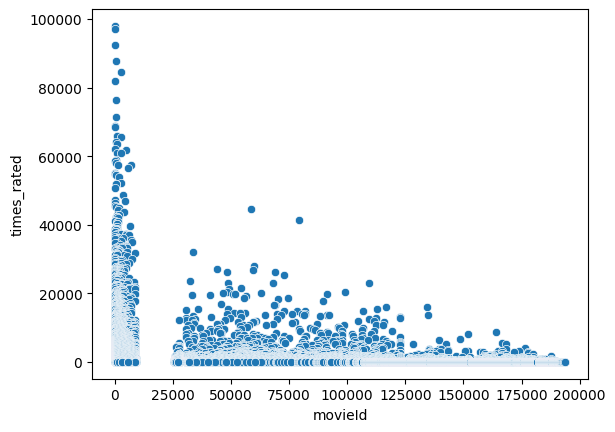

In [121]:
# scatterplot to show movieId against times rated
sns.scatterplot(data=most_rated_movies, x="movieId", y="times_rated")

<Axes: xlabel='times_rated', ylabel='title'>

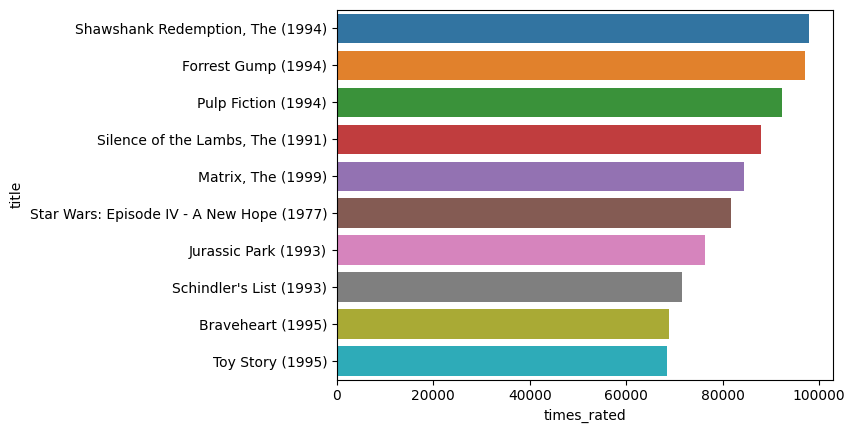

In [122]:
# barplot the top 10 most rated movies
sns.barplot(data=most_rated_movies.head(10), y="title", x="times_rated")

In [123]:
# average rating for these 10 movies
avg_rating = df_ratings[df_ratings["movieId"].isin(most_rated["movieId"].head(10))]
avg_rating["rating"].mean()

4.102288186731129

## Sorting movies by year

In [98]:
# tried to find a goood way to pickout year from the movie titles

# picks out things in ()
#years = df_movies["title"].str.extract("\((.*?)\)")

# picks out any sequense of 4 digits
#years = df_movies["title"].str.extract("(\d{4})")

# picks out sequense of 4 digits within ()
years = df_movies["title"].str.extract("\((\d{4})\)")

df_movies["year"] = years
# changes non numbers to null
#df_movies["year"] = df_movies["year"].replace("[^\d]+", "", regex=True)

# convert to year (does not work atm)
#df_movies["year"] = df_movies["year"].astype(int)

df_movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed),1946
58094,193878,Les tribulations d'une caissière (2011),Comedy,2011
58095,193880,Her Name Was Mumu (2016),Drama,2016
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,2017


In [99]:
df_movies["year"].unique()

array(['1995', '1994', '1996', '1976', '1992', '1988', '1967', '1993',
       '1964', '1977', '1965', '1982', '1985', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1959', '1968', '1980', '1975', '1986', '1948', '1943', '1950',
       '1946', '1987', '1997', '1974', '1956', '1958', '1949', '1972',
       '1998', '1933', '1952', '1951', '1957', '1961', '1954', '1934',
       '1944', '1963', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1979', '1971', '1978',
       '1966', '1962', '1983', '1984', '1931', '1922', '1999', '1927',
       '1929', '1930', '1928', '1925', '1914', '2000', '1919', '1923',
       '1920', '1918', '1921', '2001', '1924', '2002', '2003', '1915',
       '2004', '1916', '1917', '2005', '2006', '1902', nan, '1903',
       '2007', '2008', '2009', '1912', '2010', '1913', '2011', '1898',
       '1899', '1894', '2012', '1909', '1910', '1901', '1893', '2013',
       '1

In [100]:
df_movies["year"].value_counts()

2015    2312
2014    2297
2016    2219
2013    2187
2012    2019
        ... 
1887       1
1878       1
1874       1
1893       1
1883       1
Name: year, Length: 134, dtype: int64

In [101]:
# find movies without year
df_movies[df_movies["year"].isnull()]

,movieId,title,genres,year
10023,32930,Category 6: Day of Destruction,Action|Drama,NaN
10613,40697,Babylon 5,Sci-Fi,NaN
15719,79607,"Millions Game, The (Das Millionenspiel)",Action|Drama|Sci-Fi|Thriller,NaN
17444,87442,"Bicycle, Spoon, Apple (Bicicleta, cullera, poma)",Documentary,NaN
22651,107434,Diplomatic Immunity (2009– ),Comedy,NaN
...,...,...,...,...
57504,192339,The Sign of Three,(no genres listed),NaN
57674,192829,Parwaaz Hai Junoon,Adventure|Children|Romance,NaN
57789,193149,¿Qué te juegas?,(no genres listed),NaN
57903,193443,Wall,(no genres listed),NaN


In [102]:
# removes movies without year
df_movies = df_movies[df_movies["year"].notna()]
df_movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed),1946
58094,193878,Les tribulations d'une caissière (2011),Comedy,2011
58095,193880,Her Name Was Mumu (2016),Drama,2016
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,2017


In [103]:
# makes dataframe for number of movies released every year
movies_year = df_movies["year"].value_counts().reset_index().rename(columns={"index": "year", "year": "movies_released"}).sort_values("year")
movies_year

,year,movies_released
131,1874,1
130,1878,1
133,1883,1
129,1887,1
127,1888,4
...,...,...
1,2014,2297
0,2015,2312
2,2016,2219
6,2017,1891


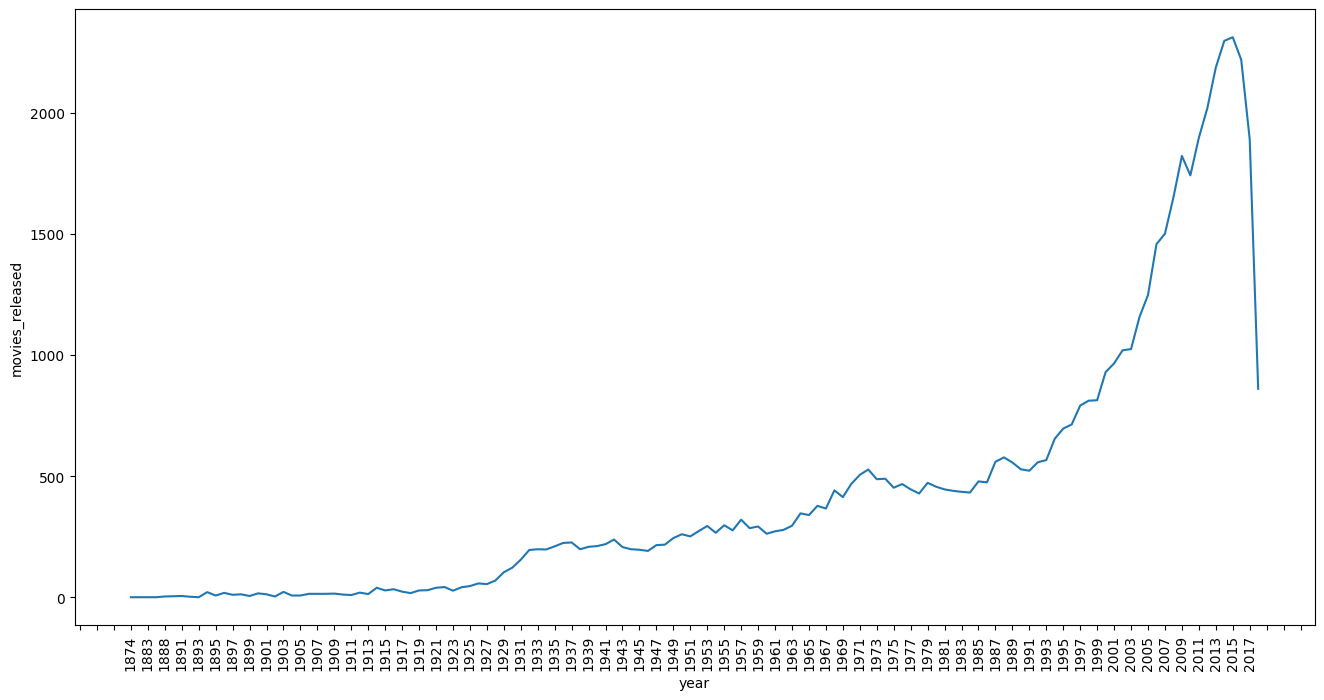

In [104]:
# plots movies released per year
fig = plt.subplots(figsize=(16,8))
ax = sns.lineplot(data=movies_year, x="year", y="movies_released")
plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MaxNLocator(80));

In [105]:
# filters users per number of movies rated
ratinges_per_user = df_ratings.groupby("userId")["movieId"].count().reset_index(name="movies_rated")
ratinges_per_user

,userId,movies_rated
0,1,16
1,2,15
2,3,11
3,4,736
4,5,72
...,...,...
283223,283224,329
283224,283225,20
283225,283226,11
283226,283227,17


In [106]:
# finds the average rating given by every user
avg_rating_user = df_ratings.groupby("userId")["rating"].mean().reset_index(name="avg_rating")
avg_rating_user

,userId,avg_rating
0,1,3.312500
1,2,3.666667
2,3,3.545455
3,4,3.397418
4,5,4.263889
...,...,...
283223,283224,3.732523
283224,283225,3.100000
283225,283226,1.818182
283226,283227,3.941176


In [107]:
# joins these two to get number of movies rated and average rating per user
users_info = ratinges_per_user.join(avg_rating_user.set_index("userId"), on="userId")
users_info.head()

,userId,movies_rated,avg_rating
0,1,16,3.312500
1,2,15,3.666667
2,3,11,3.545455
3,4,736,3.397418
4,5,72,4.263889


In [108]:
users_info.describe()

,userId,movies_rated,avg_rating
count,283228.000000,283228.000000,283228.000000
mean,141614.500000,97.989761,3.635359
std,81761.025358,212.760722,0.582801
min,1.000000,1.000000,0.500000
25%,70807.750000,15.000000,3.323529
50%,141614.500000,30.000000,3.666667
75%,212421.250000,95.000000,4.000000
max,283228.000000,23715.000000,5.000000


In [109]:
# finds "bad" users who have rated to few movies, only rate movies low or have rated to many and might be bots
bad_users = users_info.query("movies_rated < 5 or avg_rating < 2 or movies_rated > 1000")
bad_users

,userId,movies_rated,avg_rating
8,9,1,5.000000
16,17,2,4.000000
19,20,4,2.750000
32,33,1,1.000000
40,41,2,4.000000
...,...,...,...
283150,283151,1,4.000000
283168,283169,1,5.000000
283194,283195,1512,3.711971
283217,283218,35,1.314286


In [110]:
# finds ratings made by "bad users"
df_ratings[df_ratings["userId"].isin(bad_users["userId"])]

,userId,movieId,rating,timestamp
938,9,2858,5.0,939299737
1494,17,32,3.0,867664799
1495,17,780,5.0,867664799
1850,20,1088,4.0,1251340743
1851,20,1831,3.0,1251340825
...,...,...,...,...
27753309,283226,1373,2.0,1001619967
27753310,283226,2421,2.0,1001619992
27753311,283226,2642,2.0,1001620011
27753312,283226,2710,2.0,1001619953


In [111]:
df_ratings.drop(df_ratings[df_ratings["userId"].isin(bad_users["userId"])].index)

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
...,...,...,...,...
27753439,283228,8542,4.5,1379882795
27753440,283228,8712,4.5,1379882751
27753441,283228,34405,4.5,1379882889
27753442,283228,44761,4.5,1354159524


In [112]:
# funny user i found who has 6k plus rated movies but under 2 in average rating so gives most movies 0.5 or 1
df_ratings.query("userId == 111908")

,userId,movieId,rating,timestamp
10884149,111908,1,5.0,955118621
10884150,111908,2,0.5,1076137197
10884151,111908,3,0.5,1218638799
10884152,111908,4,0.5,1079438522
10884153,111908,5,1.0,1093280417
...,...,...,...,...
10890789,111908,192567,1.0,1534594058
10890790,111908,192571,0.5,1534594047
10890791,111908,192769,0.5,1535237649
10890792,111908,193613,1.0,1537216219


In [113]:
# tested makeing filtered dataframe with dummies for genres
f_test = df_movies["genres"].str.get_dummies(sep="|")
df_test

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58093,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58094,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58095,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
58096,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [114]:
# added genre dummies to movies dataframe
df_movies_genres = df_movies.join(df_test)
df_movies_genres

,movieId,title,genres,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,1995,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58093,193876,The Great Glinka (1946),(no genres listed),1946,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58094,193878,Les tribulations d'une caissière (2011),Comedy,2011,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
58095,193880,Her Name Was Mumu (2016),Drama,2016,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58096,193882,Flora (2017),Adventure|Drama|Horror|Sci-Fi,2017,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [115]:
# filtered movies based on genre (this time IMAX)
genre = df_movies_genres.query("IMAX == 1")
genre

,movieId,title,genres,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
32,33,Wings of Courage (1995),Adventure|Romance|IMAX,1995,0,0,1,0,0,0,...,0,0,1,0,0,1,0,0,0,0
36,37,Across the Sea of Time (1995),Documentary|IMAX,1995,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
148,150,Apollo 13 (1995),Adventure|Drama|IMAX,1995,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
360,364,"Lion King, The (1994)",Adventure|Animation|Children|Drama|Musical|IMAX,1994,0,0,1,1,1,0,...,0,0,1,1,0,0,0,0,0,0
589,595,Beauty and the Beast (1991),Animation|Children|Fantasy|Musical|Romance|IMAX,1991,0,0,0,1,1,0,...,0,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25246,116253,IMAX: Coral Reef Adventure (2003),Children|Documentary|IMAX,2003,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
25358,116529,Stalingrad (2013),Action|Drama|War|IMAX,2013,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
25645,117442,The Monkey King (2014),Action|Adventure|Children|IMAX,2014,0,1,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
27547,122886,Star Wars: Episode VII - The Force Awakens (2015),Action|Adventure|Fantasy|Sci-Fi|IMAX,2015,0,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [116]:
# finds ratings for movies with said genre
genre_ratings = df_ratings[df_ratings["movieId"].isin(genre["movieId"])]
genre_ratings

,userId,movieId,rating,timestamp
76,4,150,4.0,1113765768
124,4,364,4.0,1113766585
168,4,595,2.5,1115781822
605,4,5378,3.0,1127947474
626,4,5882,3.5,1127946868
...,...,...,...,...
27752815,283219,109487,3.5,1467480117
27752820,283219,122886,4.5,1467479856
27752826,283220,150,5.0,842480439
27752832,283220,364,3.0,842480555


In [117]:
# makes pivot table for genre specific data
movies_users = genre_ratings.pivot(index="movieId", columns="userId", values="rating").fillna(0)
movies_users

userId,4,5,6,10,14,15,16,18,19,21,...,283198,283199,283202,283205,283206,283209,283210,283214,283219,283220
movieId,,,,,,,,,,,,,,,,,,,,,
33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150,4.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,3.0,0.0,...,0.0,0.0,2.0,0.0,0.0,3.0,5.0,4.0,0.0,5.0
364,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
595,2.5,0.0,0.0,5.0,0.0,0.0,5.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
116529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
